In [2]:
from matplotlib import pyplot as plt 
import brainglobe_atlasapi as atlasapi
from brainglobe_atlasapi import BrainGlobeAtlas


In [3]:
atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 

The Allen Common Coordinate Framework (CCF) is a 3D reference atlas of the adult mouse brain. The atlas was created from a template averaging over a thousand imaged mouse brains, which allows for newly imaged brain samples to be registered for alignment to the atlas. The atlas is comprised of a 3D coordinate system spanning the brain, for which every point is uniquely annotated. These annotations describe the brain structure found at every point within the CCF coordinate space, and are arranged in a hierarchical manner. Let's demonstrate below.

In [4]:
# Let's check the dimensions of the annotation space for the 25 um atlas.
atlas.annotation.shape

(528, 320, 456)

The atlas is arranged in a 3D volume for which the anterior / posterior axis is the first dimension, the dorsal / ventral axis is the second dimension, and the medial / lateral axis is the third dimension. The origin of this space is in the anterior, dorsal, left corner of the volume.

Now, let's plot some of the annotations within this space. Each brain structure is represented by an ID within the annotation volume. To exemplify the annotations, we'll plot a coronal slice of the brain with the brain structure annotation IDs as a grey colormap. 

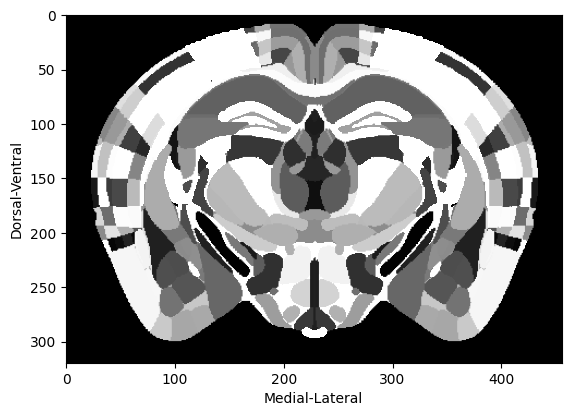

In [ ]:
ap_plane = 289
plt.imshow(atlas.annotation[ap_plane,:,:], vmax = 1000, cmap = "gray") #imshow flips the axes 
plt.xlabel("Medial-Lateral")
plt.ylabel("Dorsal-Ventral")
plt.show()

Let's say we have a spatial coordinate in a CCF registered brain volume - this could represent the location of a Neuropixels probe target or a cell feature in an anatomy dataset. 

In [24]:
coordinate = [289, 153, 237] # units in voxels (25 um space) and ap, dv, ml axes order 

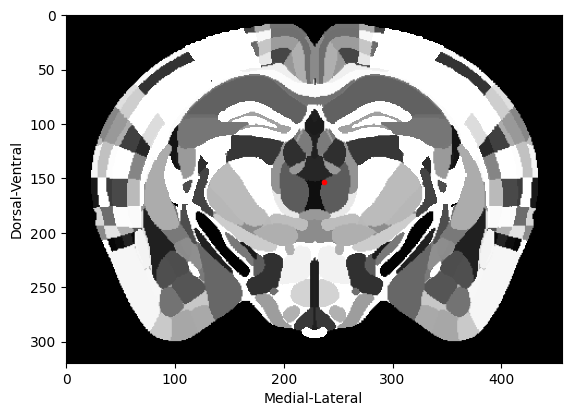

In [7]:
ap_plane = 289
plt.imshow(atlas.annotation[ap_plane,:,:], vmax = 1000, cmap = "gray")
plt.plot(coordinate[2], coordinate[1], 'r.') # imshow swaps coordinates, so input dv then ml
plt.xlabel("Medial-Lateral")
plt.ylabel("Dorsal-Ventral")
plt.show()


We can use brainglobe_atlasapi to programmatically identify which brain structure the coordinate is in. 


In [5]:
atlas.structure_from_coords(coordinate, as_acronym=True)

'MD'

Passing our brain structure through atlas.structures gives us more information.   

There are a few ways to call the brain structure: a shorthand acronym (MD), a number id (362), and full name (Mediodorsal nucleus of thalamus).  


In [9]:
atlas.structures["MD"]

{'acronym': 'MD', 'id': 362, 'name': 'Mediodorsal nucleus of thalamus', 'structure_id_path': [997, 8, 343, 1129, 549, 856, 444, 362], 'rgb_triplet': [255, 144, 159], 'mesh_filename': PosixPath('/data/.brainglobe/allen_mouse_25um_v1.2/meshes/362.obj'), 'mesh': None}

'structure_id_path' shows us the path within the structure tree hierarchy to get from the root (997) to our structure of interest MD (362)

In [11]:
atlas.structures["MD"]['structure_id_path']

[997, 8, 343, 1129, 549, 856, 444, 362]

atlas.get_structure_ancestors will show us a similar path but in acronym form, which helps us understand the greater brain structure families MD falls under. 'root' = entire brain, 'MED' = next closest node to MD in the tree hierarchy. 

In [5]:
atlas.get_structure_ancestors("MD")

['root', 'grey', 'BS', 'IB', 'TH', 'DORpm', 'MED']

It's important to note that mapping spatial coordinates to a brain structure using structure_from_coords yields the end node of the hierarchy. For example, if we call the descendants of MD, there's nothing there. 

In [13]:
atlas.get_structure_descendants("MD")

[]

We can visualize the brain structures with our coordinate overlaid by generating structure masks. For example, we'll create a 2D plot of the entire brain and mask out MD and DORpm, an overarching brain structure, as different shades of grey.

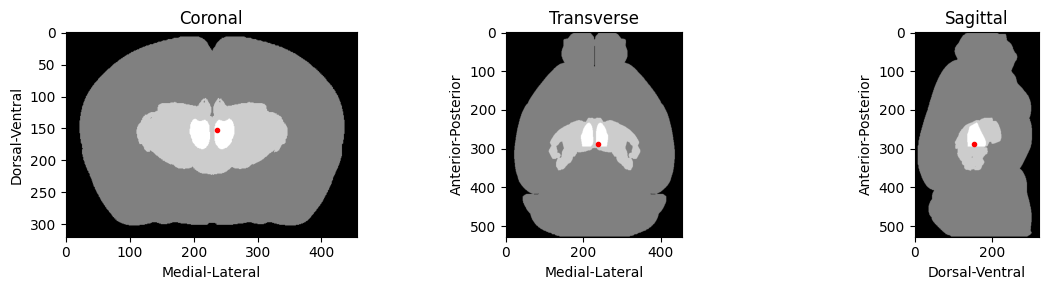

In [33]:
# Create masks for each brain structure
mask_root = atlas.get_structure_mask("root")
mask_md = atlas.get_structure_mask("MD")
mask_dorpm = atlas.get_structure_mask("DORpm")

# Assign each structure a different number for the colormap
mask_root[mask_root > 0] = 5
mask_md[mask_md > 0] = 2
mask_dorpm[mask_dorpm > 0] = 3
combined_mask = mask_root + mask_md + mask_dorpm

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Coronal View 
axs[0].imshow(combined_mask.max(0), cmap="gray")
axs[0].plot(coordinate[2], coordinate[1], 'r.')  # Adjust for imshow swapping coordinates
axs[0].set_xlabel("Medial-Lateral")
axs[0].set_ylabel("Dorsal-Ventral")
axs[0].set_title("Coronal")

# Transverse View 
axs[1].imshow(combined_mask.max(1), cmap="gray")
axs[1].plot(coordinate[2], coordinate[0], 'r.')  # Adjust for imshow swapping coordinates
axs[1].set_xlabel("Medial-Lateral")
axs[1].set_ylabel("Anterior-Posterior")
axs[1].set_title("Transverse") 

# Sagittal View 
axs[2].imshow(combined_mask.max(2), cmap="gray")
axs[2].plot(coordinate[1], coordinate[0], 'r.')  # Adjust for imshow swapping coordinates
axs[2].set_xlabel("Dorsal-Ventral")
axs[2].set_ylabel("Anterior-Posterior")
axs[2].set_title("Sagittal")

# Finalize layout and display
plt.tight_layout()
plt.show()
